In [ ]:
#dataframe

df['abc'].count()
df[['col1','col10']].head(10) #to view data from multiple columns
df[df['abc']=='fruit']
df['abc'].mean()
df.loc[:,'abc'] # Selecting rows and columns by labels
df.iloc[:,:5] # Selecting rows and columns by integer position
df['abc'].dt.day #you can assign this to a new column or if you want you can print eg: print("Date",data["pickup_datetime"].dt.day.sort_values().unique())
df['abc'].dt.month
df['abc'].dt.year
df['abc'].dt.time
df['abc'].dt.hour
df['abc'].dt.day_name() #will give name of weekdays like sunday,monday
df['abc'].dt.strftime('%Y-%m') #dt.strftime('%Y-%m-%d %H:%M:%S') you can give format as you want to
df['abc'] #accessing 1 column in dataframe
df[['abc','def']] #accessing multiple columns in dataframe
df1=df[['col1','col2','col3','col4']] #if you want to use columns of a df to another df use [[]] [[]] means df, [] means series
df.sort_values(by='abc')[:5]
df.describe() #(include='all') , you can also transpose result df.describe().t
df.duplicated() #this returns boolean series it considers all columns when identifying duplicates
df.duplicated().sum() #this returns no of rows which have duplicate values
df.duplicated(subset='colname') #if you specify a colum then it will find duplicate values only for the column not in entire df columns
df.shape[0/1] or df.shape
df['abc'].index.tolist() #or to_list() this will give list of values
df['abc'].values.tolist()
df.set_index('colname') #if you have to set index as a specific column then use this method
df['colname'].idxmax() #to get maximum index value of column similarly for min idxmin
pd.DataFrame(['col1'])
print(df.skew()) #to check if data is skewed for age 
df=pd.read_csv() #if month is like this in csv 1949-01 then you can add parse_dates=['Month'] output will be 1949-01-01
df=pd.read_excel() #header=0 or 1 etc based on which row is your header. 
df.nlargest(5,'colname') #to show 5 largest records of specific column
df.nsmallest(5,'colname') #show 5 smallest records of column
df.reindex(new_index, fill_value=0)

df.isnull().sum() #you can also use df.isna().sum() both work same
df.notnull().sum() #to find non null 
df.isnull().mean()*100 #just like you calculate total sum you can also calculate mean. *100 is for % missing values
df.dropna(axis=0/1) #subset=['price'] if you want to specify any specific column where you want to drop null values
df['abc'].fillna(df['abc'].mean()) # Fill missing values with mean
df['abc'].fillna(df['abc'].mode()[0])
df.drop(labels=['col1','col2','col3'],axis=1) #if multiple columns to drop
df.drop(['colname'],axis=1) #single column drop
df.drop(10,axis=0,inplace=True) #if you want to drop any particular row then put row number eg 10 here
df.drop(index=[2,5],axis=0,inplace=True) #if you have to drop multiple rows then provide index
df['abc'].replace(np.nan,mean)
df['abc'].str.replace('+','') #replace values with + to blank in col abc
df['Date']=final_df['Date_of_Journey'].str.split('/').str[0] #suppose you have date in format 24/03/2019 then you can split it and make 3 columns
df['Month']=final_df['Date_of_Journey'].str.split('/').str[1]
df['Year']=final_df['Date_of_Journey'].str.split('/').str[2]
#you can write code in multiple lines using \
# Drop variables and NaN cases, rename variable
df = df.drop(['island', 'year', 'sex'], axis=1)\
    .dropna()\
    .rename(columns={'species': 'y'})


#group by single column
df.groupby('col1') ['col2'].sum().sort_values().reset_index() #use of groupby and sum values can use sort_values() also
df.groupby('col1') ['col2'].sum().sort_values(ascending=False).reset_index().head(20) #another way if you have too many records to view and you want only highest 20 records to view
df.groupby('col1')['col2'].nunique().reset_index(name='give index name as you want to display') #if you want to see unique values
#group by multiple columns
df_group=df.groupby(['col1','col2']) [['col2']].sum().sort_values(by='col1') 
#you have to provide multiple columns in a list then provide in a list and aggregate col in [[]] as it will give a dataframe
df_group=df.groupby(['col1','col2']).col3.sum().sort_values().reset_index()
df_group=df.groupby(["col1", "col2"]).agg({"col1": "sum"}) #this is another way using agg function
df_group=df.groupby(['col1','col2','col3']).size().reset_index().rename(columns={0: 'give columnname'}) 
#if you have to calculate count number for grouped columns then use size()
#calculate the ratio or % 
df['col1'].value_counts()/df.shape[0]*100 #value_counts give a series and index is sorted in descending order by default.
df['col1'].value_counts().to_dict()
#if you want to convert series into a dict use to_dict
df.insert(loc, column, value, allow_duplicates=False/True) # used to insert a new column into a DataFrame at a specified location.

#to calculate Q1, Q2 is median, Q3
q1 = df.groupby('col1')['col2'].quantile(0.25)
q2 = df.groupby('col1')['col2'].median()
q3 = df.groupby('col1')['col2'].quantile(0.75)
# Combine results into a DataFrame
region_stats = pd.DataFrame({
    'Q1': q1,
    'Q2': q2,
    'Q3': q3
})
print(region_stats)

#to view correlation between multiple columns
df[['a','b','c','d']].corr()

#to convert numerical data to categorical you can create such function and apply it to the df column
def age_cat(age):
    if age >= 10 and age <= 20:
        return '10-20'
    elif age > 20 and age <= 30:
        return '20-30'
    elif age > 30 and age <=40:
        return '30-40'
    else:
        return '40-50'
    
df['age_cate']= df['Age'].apply(age_cat) #creating a new column applying changes to it
df['age_new'] = df['Age'].apply(lambda x:x**2) #lambda and apply willl apply 
df['Gender'].map({'F':0,'M':1}) #suppose you have to assign certain values in a column
# Create 'currency' and 'rate_type' columns from 'rate' column which is string type
rate_split = data['rate'].str.split('/', expand=True)
data["currency"] = rate_split[0]
data["rate_type"] = rate_split[1].apply(lambda x: "fixed" if pd.isna(x) else "hourly")
#to change data to lowercase in column
data["col1"] = data["col1"].apply(lambda x: [element.lower() for element in x])

list=[1,2,3,4,5]
df['Gender'].filter(lambda x:x%2==0,list) #to filter data from a list

#if else statement in one line
df['col1'] = [1 if x>0 else 0 for x in (df['col2']-df['col3'])]
[features for features in df.columns if df[features].isnull().sum()>0] #this will give columns which don't have null values
1 if x>0 else 0 for x in (df['col2']-df['col3'])
for colname in df.columns if df[colname].isnull().sum()

#to calculate upper limit lower limit values of data. anything above upper limit will be outlier
percentile_25 = df['colname'].quantile(0.25)
percentile_75 = df['colname'].quantile(0.75)
median = df['colname'].median()
lower_limit = percentile_25 - 1.5*(percentile_75 - percentile_25)
lower_limit = 0 if lower_limit < 0 else lower_limit
upper_limit = percentile_75 + 1.5*(percentile_75 - percentile_25)
print(f'lower_limit:{lower_limit}, upper_limit: {upper_limit}')

#to check outlier
df[df['colname'] > upper_limit]

#to print unique values of object datatype
for col in df.columns:
    if df[col].dtype=='object':
        print(col,df[col].unique(),"\n")
        
for i, value in enumerate(df['col1'].value_counts()):
    plt.text(i, value, str(df['col1'].value_counts()), ha='center', va='bottom') #this is for visuals 
        
#to filter data in df by excluding records of not use this is a sample example        
df_none=df[(df['Amount_of_tip'] < 20) & (df['Delivery_Region'] != 'None')]

# Calculate marginal probabilities
mp_p = (df['col1'].value_counts() / len(df['col1'])
        ).reset_index(name='Probability').round(2) 
#if you will not reset index you will not get index like 0,1,2 also you will not get column names 
#so important to reset index and if you want different columnname you can also specify that with name= 

In [ ]:
#numpy

np.linspace(0,10,5) #generate numbers 1-D array with 5 equally spaced values from 0 to 10
np.arange(10) #generate numbers 1-D array with values from 0 to 9
array=np.array(['1','2','3']) #1D array from python list
array_2d=np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]) #2d array 3 rows 3 columns
array_2d.shape #2
array_2d.ndim # (3,3)
array_2d.size #9
matrix1 = np.array([[1, 2], [3, 4]])
matrix2 = np.array([[5, 6], [7, 8]])
result = np.dot(array1, array2) #matric multiplcation
#lists and tuples are useful for storing data of different data types 
#wheras numpy array must have the same data type but it is much faster than Python lists and tuples for numerical computations
np.zeroes((2,3)) #2D array filled with zeroes from python tuple.  
np.sqrt(array)
np.sum(array)
np.mean(array)
np.max(array)
np.min(array)
np.random.rand(2, 2) #2x2 array with random values from a uniform distribution
np.sum(), np.mean(), np.std(), np.min(), np.max() #Basic statistics.
np.split()
np.where() #df['new_col']= np.where(df['col1'].notna(), 'Yes', 'No') it is conditional statement used a lot
np.percentile(array,25) or q1,q2=np.percentile(array,[25,75])
np.var(array,axis=0/1) #calculates population variance not sample var
np.random.rand(3,2) #generated 3*2 array
np.random.randn(100) #generates 100 random numbers
np.random.randint(1,10, size=5) #Generate 5 random integers between 1 and 10
np.random.normal(mean, standard deviation, number of random samples) # used to generate random numbers from a normal (Gaussian) distribution
np.random.lognormal(mu, standard deviation, size) #enerates random numbers from a log-normal distribution.It is commonly used to model data that are positively skewed and have a long right tail.
np.random.pareto()

In [ ]:
#statistics

statistics.variance #sample variance
statistics.pvariance #population variance

In [ ]:
#scipy

from scipy.stats import pareto, expon, norm, uniform

# Define range for x values
x = np.linspace(0.1, 10, 1000)

# Parameters for the distributions
alpha = 2.5  # Shape parameter for Pareto distribution
lambda_exp = 0.5  # Rate parameter for Exponential distribution
mu = 0           # Mean for Normal distribution
sigma = 1        # Standard deviation for Normal distribution
a = 2            # Lower bound for Uniform distribution
b = 8            # Upper bound for Uniform distribution

# Calculate PDFs for each distribution
pdf_pareto = pareto.pdf(x, alpha, scale=1)
pdf_exp = expon.pdf(x, scale=1/lambda_exp)
pdf_norm = norm.pdf(x, mu, sigma)
pdf_uniform = uniform.pdf(x, a, b - a)

# Generate data points for x
x = np.linspace(-5, 5, 1000)

# Calculate PDF and CDF for standard normal distribution
pdf = norm.pdf(x)
cdf = norm.cdf(x)

# Plot PDF and CDF
plt.figure(figsize=(10, 6))
plt.plot(x, pdf, label='PDF', color='b')
plt.plot(x, cdf, label='CDF', color='r')

plt.title('PDF vs CDF')
plt.xlabel('x')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#pandas

df4=pd.DataFrame({'B:'['B2','B3','B6','B7'],
                  'C:'['C2','C3','C6','C7']},
               index=[2,3,6,7])
#f there are multiple csv files in data source and you have to make a single file then use concat or merge. 
pd.concat([df,df4], axis=1, join='inner') #concat is to append dataframes rowwise or columnwise
pd.merge(df1,df2,on='abc',how='outer/inner') #merge is to combine dataframe on common columns


pd.crosstab(df["abc"],df["def"],margins=True, margins_name='All')
pd.pivot_table(df,index=["abc"],values="def")
df.pivot(index='abc',columns='def')
df["abc"].astype("int")
#if you want to change datatype of col on the fly and dont want to permananetly change in df. Here all 3 cols datatype will change to str
df['new']= df[['col1','col2','col3']].astype(str).agg('-'.join, axis=1) 
df["abc"]=pd.to_datetime(df["abc"]) #to convert to datetime format
pd.get_dummies(df['abc']) #to encode all categorical variables
pd.series(pd.date_range('2024-01-01', end='2024-05-01',freq='D'))
#to convert series to df use reset_index and assign column names
df_grouped = df_grouped.reset_index() #
df_grouped.columns = ['abc', 'def'] #columns name provide



In [ ]:
#Matplotlib

import matplotlib.pyplot as plt
%matplotlib inline 
plt.figure(figsize=((15,5)))
Plt.title(‘’)
plt.ylim(ymin=0) # you can also write as plt.ylim(0,)
plt.xlim(xmin=0)
Plt.xlabel(“xheight”)
Plt.ylabel(“yheight”)
plt.xticks(ticks=[0,1,2,3], lables=['p1','p2','p3','p4'])
plt.xticks(range(0, 160, 10), list(np.arange(0,160,10)))
plt.plot(col1,'Y--',label='') #willl give dash lines in yellow
plt.plot(col2,'go') # will give green circle in shape
plt.legend(labels=['col1','col2'],loc='lower right')
plt.axvline(x=8,color='red',lw=1,ls='--',alpha=0.5) #put value of x where you want to draw reference line on x axis
plt.axhline(y=80,color='red',lw=1,ls='--',alpha=0.5)
plt.text(3, 6, 'Important point', fontsize=12, color='red') # Add text at specified coordinates specify x and y coordinate
#you can show a reference line if you want to focus on something in visual

# Plotting using pandas and matplotlib
df['abc'].plot(kind='hist/line/bar/barh/kde/density/area/scatter/box',color='Red') 
# bins=10 for hist plot, if area plot can use stacked=True/False optional
df[["col1","col2"]].groupby("col1").sum().sort_values(by="col2", ascending=False).plot(kind = "bar", color = "green", figsize=(16,6)) #another example
plt.xlabel('')
plt.ylabel('')
plt.title('')
plt.axvline(x=8,color='red',lw=1,ls='--',alpha=0.5) #optional statement if don't want
plt.text(3, 6, 'Text you want to put', fontsize=12, color='red') # Add text at specified coordinates
plt.show()

#To make dual axis chart with y axis common in both use subplot
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(6,6),sharey=True)
ax[0].plot(col1,'go')
ax[1].plot(col2)

#pie chart (univariate analysis)
# Data
labels = ['A', 'B', 'C', 'D']
sizes = [15, 30, 45, 10]  # Values for each slice
# Create a pie chart
plt.figure(figsize=(6, 6))  # Set the figure size
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')
# Add a title
plt.title('Pie Chart Example')


#another way to do this for creating multiple pie charts using subplots
plt.subplot(4,2,1)
data_p = df['MaritalStatus'].value_counts() #always use value_counts to calculate this will give values in desc order hence your pie chart will have top values as % value split
labels = data_p.index
plt.title('Marital Status', fontsize = 20)
plt.pie(data_p, labels=labels, explode = [0.05,0.05], autopct='%1.1f%%',
        startangle=90, counterclock=False, pctdistance=0.6,
        textprops={'fontsize': 12},
        colors=['lightgreen', 'lightpink']) #colors = ['coral','#FFDAB9','yellowgreen','#6495ED']
#explode will break your pie chart and show like partitions
plt.tight_layout()
plt.show()

#to create a donut chart
data_p=df['abc'].value_counts() #always use value_counts to calculate this will give values in desc order hence your pie chart will have top values as % value split
lbl=data_p.index.to_list()
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.pie(data_p[:3],labels=lbl[:3],autopct="%1.1f%%",colors=["#96B6C5","#FDE5EC"]) #outer circle #if you want to diaply only top 3 values in pie chart then specify [:3]
plt.title("Gender in Attrition",color='red')
my_circle=plt.Circle( (0,0), 0.7, color='white') #inner circle
p=plt.gcf()
p.gca().add_artist(my_circle)

In [ ]:
#Seaborn

sns.set_style("whitegrid") 

###univariate analysis
sns.countplot(df['colname'],x='')
sns.violinplot(df['col1'],orient='vertical',color='magenta/green')
sns.boxplot(df['colname'],orient='vertical/horizontal') 
#this will pllot only one column with values on y axis
sns.histplot(y='colname',data=df,bins=range(0, 41, 5),binwidth=5,shrink=0.7,multiple='dodge',hue='colname')
#hue='colname', bins=10 (can provide number of numbers),multiple='dodge' (for better comparison between bars use this)
#depends how many bins you want and width you can provide x axis if you want bars in x axis else give y axis
#can also plot histogram without seaborn-- df.hist(bins=60,figsize=(20,15))

###Density plot
sns.kdeplot(df['col1'],shade=True,fill=True) #kernel density estimation
sns.displot(data=df['col1'], height=8, aspect=1.6, kde=True, color='dodgerblue') #histogram and kde combined dont want kde then remove kde parameter


###bivariate analysis (Numerical-categorial)
sns.barplot((x='',y='',data=df,palette='YlOrRd_r',order=(train.groupby(['col1','col2']).col3.sum().sort_values(ascending=False).reset_index().head(20)['col1'])))
#for single boxplot
sns.boxplot(x="col1",y="col2",data=df, showmeans=True) 
#in a single plot it will create multiple boxplots for all the distinct values of column in x axis  showmeans=True is optional
#for creating multiple boxplots for df use subplot
plt.subplot(1,2,1)
sns.boxplot(y=df['col1'],palette=['#EA906C'])
#you can also create loop instead of writing manually various subplots
plt.figure(figsize=(25,50))
for i in range (0 , df.shape[1]): 
  plt.subplot(9,3,i+1) #9 is number of rows 3 is number of columns
  sns.boxplot(y=df.iloc[:,i],palette=['#EA906C'])
  plt.title(df.columns[i])


#bivariate analysis (Numerical-Numerical)
sns.lineplot(x='col1',y='col2',data=df[:50],hue='col3')
#hue is optional #if you want to plot for only 50 records then df[:50]
sns.pointplot(x=df.groupby('col1').sum().reset_index()['col1'],y=train.groupby('col1').sum().reset_index()['col2'],color='blue')

###For categorical data (scatter plots)
sns.catplot(x='',y='',data=df[:250],kind='strip/swarm/box/violin/box',palette="Oranges_r")
# default is scatter plot so if you want other shapes then specify
sns.countplot(x='col1',data=df,hue='col2',order=df['col1']) #for two categorical data it will plot count for x axis for various hue
#if you want to get label on countplot bars use bar_label method
ax1=sns.countplot(df['abc'],x=df['abc'])
for bars in ax1.containers:
  ax1.bar_label(bars)

#if you want to create multiple visualizations i.e. few distplots and countplot then use subplots
figure, ax = plt.subplots(4,2, figsize=(12,12))
#See the distrubution of the data
sns.distplot(data['charges'],ax= ax[0,0])
sns.distplot(data['age'],ax=ax[0,1])
sns.distplot(data['bmi'],ax= ax[1,0])
sns.distplot(data['children'],ax= ax[1,1])
ax1=sns.countplot(data['sex'],x=data['sex'],ax=ax[2,0])
for bars in ax1.containers:
  ax1.bar_label(bars)
sns.countplot(data['smoker'],x=data['smoker'],ax= ax[2,1])
sns.countplot(data['region'],x=data['region'],ax= ax[3,0])


#explore correlation between multi dimensional data
sns.pairplot(df,hue='',height=, corner=True)  #put corner for sure 
#pairgrid is another way to visualize relationship between variables. used commonly in ML clustering/classification models)
sns.PairGrid(
    df, 
    vars=['col1', 'col2', 'col3', 'col4'], #these are all the variables you wat to check relationship with predictor variable y 
    hue='y', #this is your predictor variable
    diag_sharey=False, 
    palette=["red", "green", "blue"])
# Adds histograms on the diagonal
g.map_diag(plt.hist)
# Adds density plots above the diagonal
g.map_upper(sns.kdeplot)
# Adds scatterplots below the diagonal
g.map_lower(sns.scatterplot)
# Adds a legend
g.add_legend()

#here density plot is for univariant and scatterplot is for bivariant data
sns.scatterplot(x=df['col1'],y=df['col2'],hue='',s=10,palette = 'colorblind') 
#hue is optional, s is size , either you specify df in x and y axis like x= df['col1'] or you don't give x='col1',y='col2'and specify data=df
sns.scatterplot(x='col1',y='col2',hue='',s=10, data=df,palette = 'colorblind') #another way of syntax
sns.scatterplot(y=df['col1']-df['col2'],x=train['col3'])  #another way if you want to suubtract 2 columns can also do straight here
sns.relplot(x='col1',y='col2',data=df[:200],kind='scatter',hue='col3',size='col3') 
#hue,kind,size is optional (size will determine scatter plot bubbles sizes)
sns.relplot(x='col1',y='col2',data=df,kind='scatter',hue='col3',style='col3',col='col3') 
#this will create scatter plot for each col i.e. col3
sns.regplot(x="col1",y="col2",data=df) #color='blue' 
#"regplot" plots the scatterplot plus the fitted regression line for the data.
#regplot doesn't have hue option hence if you want regplot with hue then use lmplot
sns.lmplot(x="col1", y="col2", hue="col3", data=df, palette = 'muted', height = 6) #this will give regression fitted line (used for ML models)

sns.heatmap(df,annot=True,cmap='YlGnBu',fmt='.2f') 
#if your df has both int and object data type it cannot create heatmap you need to specify numeric colnames to create heatmap
#If you want to normalize then use it ,fmt is to format the values as integer/float
#heatmap can be used with int/float or numerical data type if you want to use categorical data then create a crosstab between x and Y
sns.heatmap(pd.crosstab(df['col1'], df['col2'],normalize = True),annot = True) #normalize is optional
#another way after finding correlation heatmap can be made 
corr = train.corr(numeric_only=True) #correlation of finding relationship between numerical values
sns.heatmap(corr, annot=True)
#try this full code and build heatmap here we are removing 
SP_corr = df.corr()
mask = np.zeros_like(SP_corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(12, 10))
    ax = sns.heatmap(SP_corr, mask=mask, vmax=1, vmin=-1, linewidths=.5, square=True, cmap='coolwarm', annot=True)
    plt.title('', fontsize = 15)
    plt.yticks(rotation=0)
    plt.tight_layout()

# Add labels and title at the end for all above visuals
plt.xlabel('Total Bill ($)') #fontdict={'fontsize':12} can be added optional
plt.ylabel('Tip ($)')
plt.title('Scatter Plot of Tips vs Total Bill')  #fontdict={'fontsize':12} can be added optional
plt.show()

In [1]:
#implementing chi square test
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Example dataset of UFO sightings
data = {
    'Day': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    'Weekday_Sightings': [100, 120, 110, 105, 115, 200, 220]  # Number of sightings per day
}

# Convert the data into a pandas DataFrame
df = pd.DataFrame(data)

# Add a column for weekend/weekday classification
# 1 for weekend (Saturday and Sunday), 0 for weekday (Monday to Friday)
df['Weekend'] = np.where(df['Day'].isin(['Saturday', 'Sunday']), 1, 0)

# Print the DataFrame to verify the data
print(df)

         Day  Weekday_Sightings  Weekend
0     Monday                100        0
1    Tuesday                120        0
2  Wednesday                110        0
3   Thursday                105        0
4     Friday                115        0
5   Saturday                200        1
6     Sunday                220        1


In [2]:
# Contingency table
contingency_table = pd.crosstab(df['Weekend'], df['Weekday_Sightings'])
contingency_table


Weekday_Sightings,100,105,110,115,120,200,220
Weekend,,,,,,,
0,1,1,1,1,1,0,0
1,0,0,0,0,0,1,1


In [7]:
data = {'Name': ['Alice', 'Bob', 'Charlie', 'David'],
        'Age': [25, 30, 35, 40]}
df = pd.DataFrame(data)
df

,Name,Age
0,Alice,25
1,Bob,30
2,Charlie,35
3,David,40


In [3]:
s = pd.Series([1, 2, 3, 4, 5], index=['a', 'b', 'c', 'd', 'e'])
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [27]:
data = {'Name': ['Alice', 'Bob', 'Charlie', 'David'],
        'Age': [25, 30, 35, 40]}
df = pd.DataFrame(data)
# Lets say I want to square each term in my_list.
squared_list = list(map(lambda x:x**2,df['Age']))
squared_list

[625, 900, 1225, 1600]

In [18]:
data = {'Name': ['Alice', 'Bob', 'Charlie', 'David'],
        'Age': [25, 30, 35, 40]}
df = pd.DataFrame(data)
# Lets say I want to square each term in my_list.
df['age_new'] = df['Age'].apply(lambda x:x**2)
df

,Name,Age,age_new
0,Alice,25,625
1,Bob,30,900
2,Charlie,35,1225
3,David,40,1600


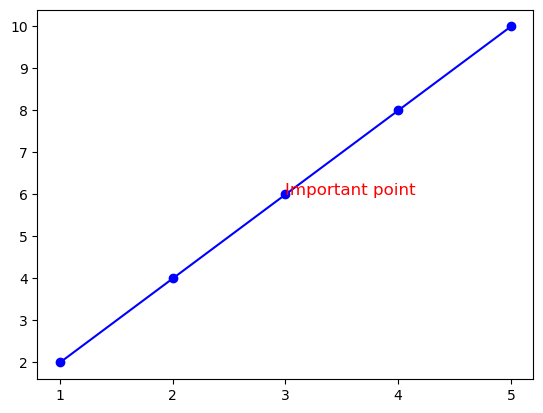

In [37]:
import matplotlib.pyplot as plt

# Create some data
x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 10]

# Plot the data
plt.plot(x, y, 'b-o')
plt.xticks(range(1, 6), np.arange(1,6))

# Add text at specified coordinates
plt.text(3, 6, 'Important point', fontsize=12, color='red')

# Show the plot
plt.show()

In [29]:
for left in range(7):
    for right in range(left,7):
        print("[",left,"|",right,"]", end=" ")
    print()

[ 0 | 0 ] [ 0 | 1 ] [ 0 | 2 ] [ 0 | 3 ] [ 0 | 4 ] [ 0 | 5 ] [ 0 | 6 ] 
[ 1 | 1 ] [ 1 | 2 ] [ 1 | 3 ] [ 1 | 4 ] [ 1 | 5 ] [ 1 | 6 ] 
[ 2 | 2 ] [ 2 | 3 ] [ 2 | 4 ] [ 2 | 5 ] [ 2 | 6 ] 
[ 3 | 3 ] [ 3 | 4 ] [ 3 | 5 ] [ 3 | 6 ] 
[ 4 | 4 ] [ 4 | 5 ] [ 4 | 6 ] 
[ 5 | 5 ] [ 5 | 6 ] 
[ 6 | 6 ] 


In [44]:
import time

# Loop to simulate progress updates
for i in range(10):
    # Print progress
    print("Progress: {}/10".format(i), end='\r')
    # Simulate some processing time
    time.sleep(1)

print("\nTask complete!")

Progress: 9/10
Task complete!


In [25]:
File_count= {"jpg":10, "txt":14, "csv":2}
print(File_count.keys())
print(File_count.values())

TypeError: dict.keys() takes no arguments (1 given)

In [37]:
def one_dict(list_dict):
    out_dict={} #key: [] is a dictionary comprehension where each key in the keys variable is used to create a key-value pair in the out_dict dictionary.
    for key, value in list_dict.items():
        out_dict[key]=[value]
    return out_dict

result=one_dict({"jpg":10, "txt":14, "csv":2})
print(result)

{'jpg': [10], 'txt': [14], 'csv': [2]}


In [38]:
def one_dict(list_dict):
    keys=list_dict.keys()
    out_dict={key:[] for key in keys} #key: [] is a dictionary comprehension where each key in the keys variable is used to create a key-value pair in the out_dict dictionary.
    for key, value in list_dict.items():
        out_dict[key].append(value)
    return out_dict

result=one_dict({"jpg":10, "txt":14, "csv":2})
print(result)


{'jpg': [10], 'txt': [14], 'csv': [2]}


In [35]:
wardrobe = {"shirt":["red","blue","white"], "jeans":["blue","black"]}
for keys,values in wardrobe.items():
    for value in values:
      print(f"{value} {keys}")

red shirt
blue shirt
white shirt
blue jeans
black jeans


In [12]:
import plotly.graph_objects as go
import pandas as pd

# Sample data
data = {
    'Date': ['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04', '2022-01-05'],
    'Open': [100, 110, 105, 115, 120],
    'High': [120, 115, 125, 120, 125],
    'Low': [90, 105, 100, 110, 115],
    'Close': [110, 105, 115, 120, 115]
}

# Create a DataFrame
df = pd.DataFrame(data)
df['Date'] = pd.to_datetime(df['Date'])

# Create the candlestick chart
fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                                     open=df['Open'],
                                     high=df['High'],
                                     low=df['Low'],
                                     close=df['Close'])])

# Update layout
fig.update_layout(xaxis_rangeslider_visible=False,
                  title='Candlestick Chart',
                  xaxis_title='Date',
                  yaxis_title='Price')

# Show the chart
fig.show()


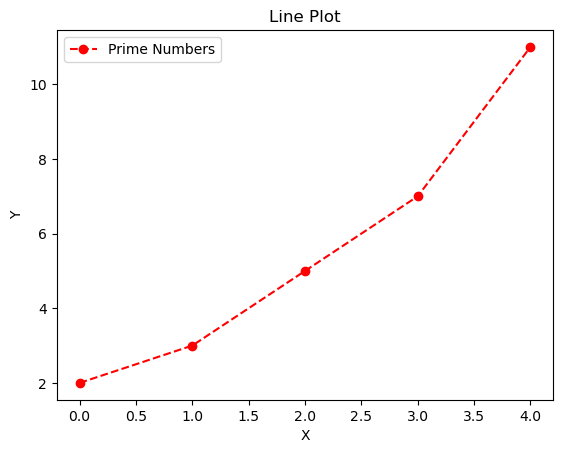

In [41]:
import matplotlib.pyplot as plt

#Data
x = [1, 2, 3, 4, 5]
y = [2, 3, 5, 7, 11]

#Plot the data
plt.plot( y, 'ro--', label='Prime Numbers')

#Customize the plot
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Line Plot')
plt.legend()

#Show the plot
plt.show()


In [47]:
class circle(object):
    def __init__(self,radius,color): #this is constructor method
        self.radius=radius
        self.color=color
    def add_radius(self,r): #this is Instance method
        self.radius=self.radius+r  
        return self.radius

In [67]:
c1=circle(2,'red') #creating object instances
print(c1.radius)
print(c1.add_radius(5)) #object.method
c1.radius=3
print(c1.add_radius(5)) #object.method
dir(c1)

2
7
8


['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'add_radius',
 'color',
 'radius']

In [57]:
class Car():
    max_speed=120
    def __init__(self,make,model,color,speed=10):
        self.make=make
        self.model=model
        self.color=color
        self.speed=speed
        
    def accelerate(self,acceleration):
        if (self.speed+acceleration<=Car.max_speed):
            self.speed+=acceleration
        else:
            self.speed=Car.max_speed
            
    def get_speed(self):
        return self.speed

In [61]:
car1=Car("Toyota","Camry","Blue")
car2=Car("Honda","Civic","Red")
car1.accelerate(20)
car2.accelerate(40)
print(f"{car1.make} {car1.model} is accelarting at {car1.get_speed()} km/h.") #curly braces becuse you are accepting input
print(f"{car2.make} {car2.model} is accelarting at {car2.get_speed()} km/h.")

Toyota Camry is accelarting at 30 km/h.
Honda Civic is accelarting at 50 km/h.


In [71]:
class Vehicle:
    color="white"
    
    def __init__(self,max_speed,mileage):
        self.max_speed=max_speed
        self.mileage=mileage
        self.capacity=None #since no value provided hence can initiate as None or if you do not initiate then also ok
        
    def seating_capacity(self,capacity):
        self.capacity=capacity
        
    def display_properties(self):
        print("Properties of the vehicle:")
        print("color:", self.color)
        print("maximum speed:", self.max_speed)
        print("mileage:", self.mileage)
        print("seating capacity:", self.capacity)

v1=Vehicle(200,20)
v1.seating_capacity(5)
v1.display_properties()

v2=Vehicle(180,25)
v2.seating_capacity(4)
v2.display_properties()

Properties of the vehicle:
color: white
maximum speed: 200
mileage: 20
seating capacity: 5
Properties of the vehicle:
color: white
maximum speed: 180
mileage: 25
seating capacity: 4


In [83]:
file1='abc fgy gyhh'
for n in range(0, 2):

    print(file1.readline())

AttributeError: 'str' object has no attribute 'readline'

In [ ]:
def column_summary(df):
    summary_data = []
    
    for col_name in df.columns:
        col_dtype = df[col_name].dtype
        num_of_nulls = df[col_name].isnull().sum()
        num_of_non_nulls = df[col_name].notnull().sum()
        num_of_distinct_values = df[col_name].nunique()
        
        if num_of_distinct_values <= 10:
            distinct_values_counts = df[col_name].value_counts().to_dict()
        else:
            top_10_values_counts = df[col_name].value_counts().head(10).to_dict()
            distinct_values_counts = {k: v for k, v in sorted(top_10_values_counts.items(), key=lambda item: item[1], reverse=True)}

        summary_data.append({
            'col_name': col_name,
            'col_dtype': col_dtype,
            'num_of_nulls': num_of_nulls,
            'num_of_non_nulls': num_of_non_nulls,
            'num_of_distinct_values': num_of_distinct_values,
            'distinct_values_counts': distinct_values_counts
        })
    
    summary_df = pd.DataFrame(summary_data)
    return summary_df

# Example usage:
# Assuming df is your DataFrame
summary_df = column_summary(df)
display(summary_df)

In [2]:
def my_function(a, b):
    print(a, b)

#my_function(a=1, b=2)          # This is equivalent to my_function(1, 2)
my_function(**{'a': 1, 'b': 2})# This is also equivalent to my_function(1, 2)


1 2


In [7]:
import matplotlib.pyplot as plt
import scipy.stats as stat
import pylab
import numpy as np
import seaborn as sns
def plot_data(sample):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    sns.histplot(sample)
    plt.subplot(1,2,2)
    stat.probplot(sample,dist='norm',plot=pylab)
    plt.show()

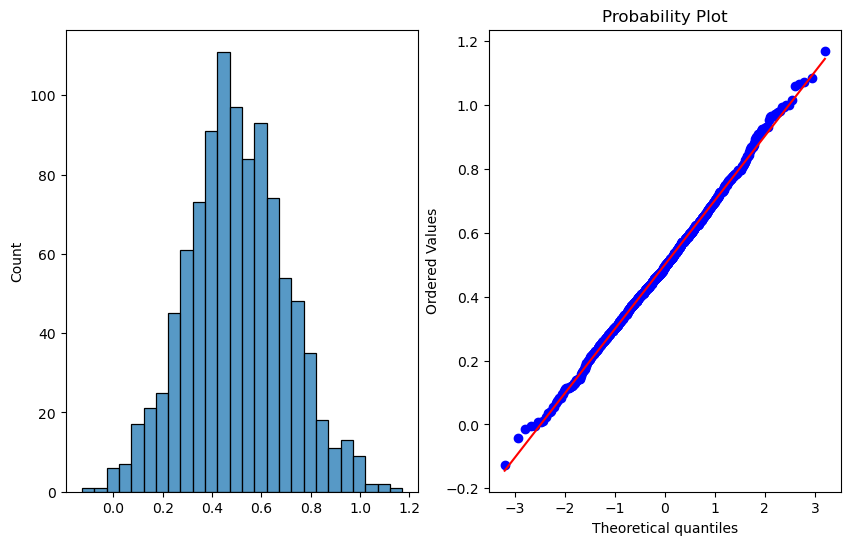

In [8]:
s=np.random.normal(0.5,0.2,1000)
plot_data(s)

In [9]:
import numpy as np

# Generate 1000 samples from a Pareto distribution with shape parameter 3
samples = np.random.pareto(a=3, size=1000)